In [2]:
import pandas as pd


In [3]:
import numpy as np

In [4]:
d = "C:\\Users\\biswa\\OneDrive\\Desktop\\somethings.24\\Social_Network_Ads.csv"

In [5]:
df = pd.read_csv(d)

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.drop(['User ID','Gender'],inplace=True,axis=1)

In [8]:
df.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['Age','EstimatedSalary']],df.Purchased,test_size = 0.3,random_state=0)

In [10]:
x_train.shape,x_test.shape,

((280, 2), (120, 2))

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()


In [13]:
# fit the scaler to the train set, it will learn the parameters
# sikhte ho train data se--> but apply karte ho train and test 2no pe

scaler.fit(x_train)
# x_train er mean and standard deviation find kore niyeche

StandardScaler()

In [14]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [15]:
scaler.scale_

array([1.01999375e+01, 3.45792870e+04])

# Standard deviation formula(Z_score Normalization)

            z = (xi - mean(u))/ standard deviation(std) --> applied on both test and train set 

In [16]:
# transform train and test both
x_train_scaled = scaler.transform(x_train) #-->  x_train_scaled is a numpy array-> not a data frame
x_test_scaled = scaler.transform(x_test) # numpy array

In [17]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [33]:
x_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [18]:
# convert it to dataframe
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [19]:
x_train_scaled.head(2)

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

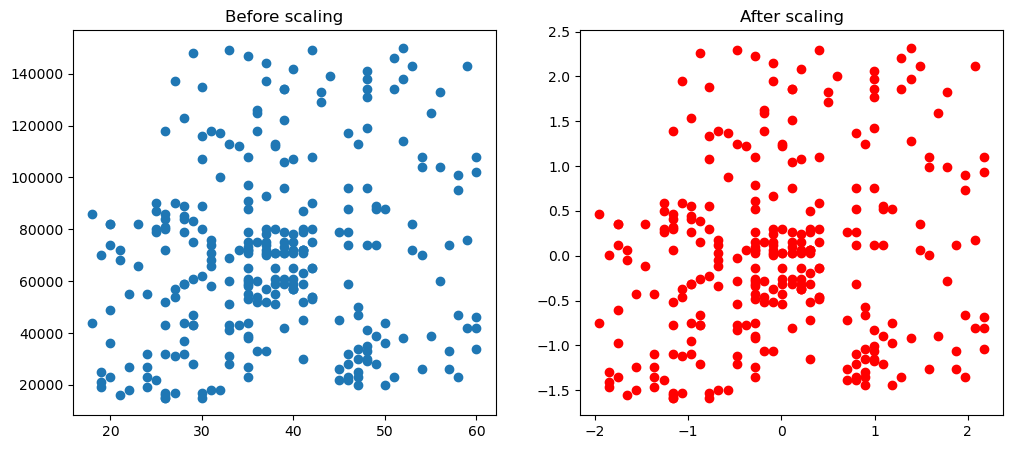

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot the data before scaling
ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before scaling")

# Plot the data after scaling
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After scaling")

# Display the figure
plt.show()

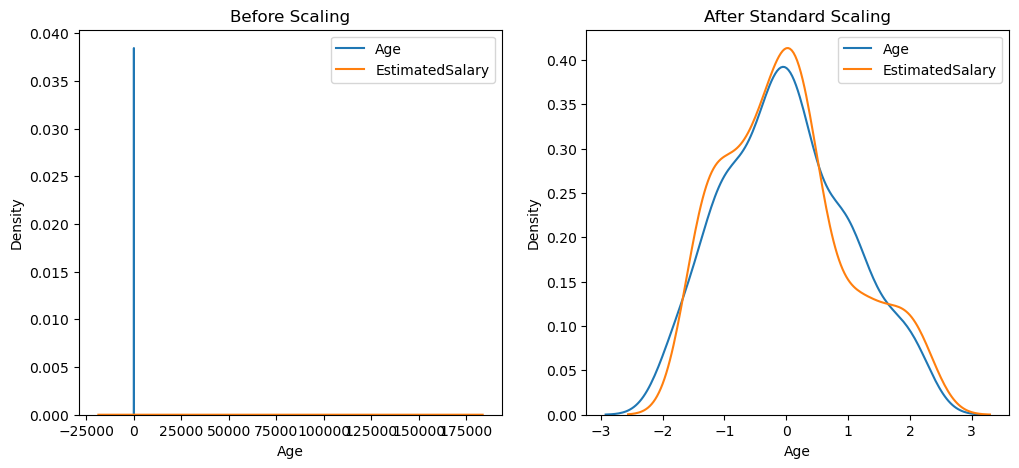

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot KDEs before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1, label='Age')  # Plot KDE of Age on the first subplot (ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1, label='EstimatedSalary')  # Plot KDE of EstimatedSalary on the first subplot (ax1)
ax1.legend()

# Plot KDEs after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2, label='Age')  # Plot KDE of scaled Age on the second subplot (ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2, label='EstimatedSalary')  # Plot KDE of scaled EstimatedSalary on the second subplot (ax2)
ax2.legend()

# Display the figure
plt.show()

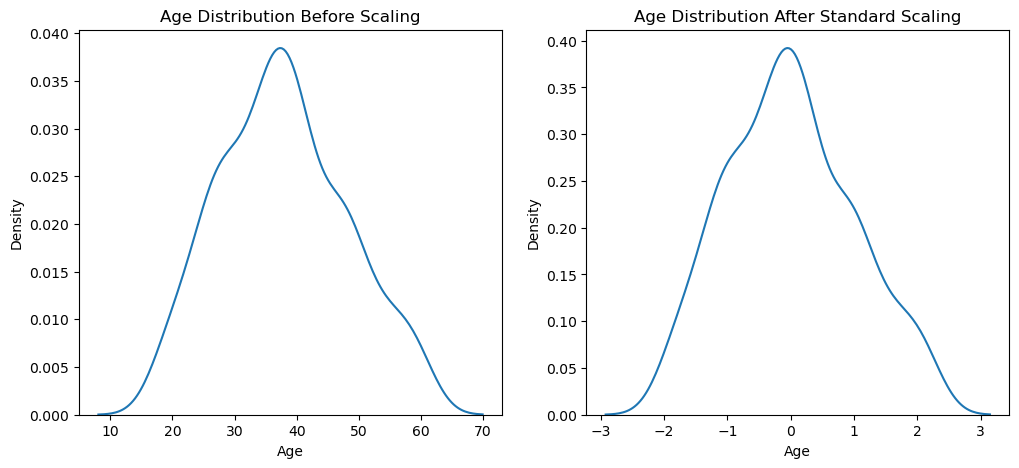

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

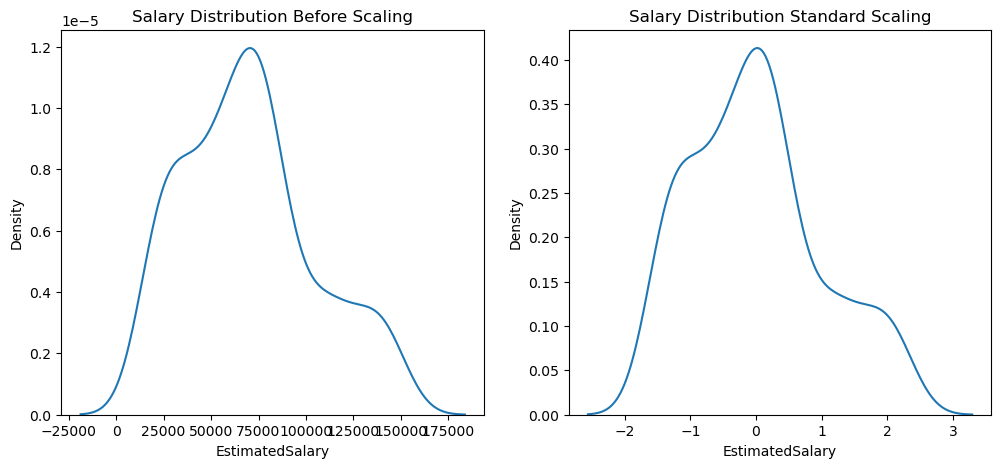

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [28]:
lr.fit(x_train,y_train) ## ---> training the model

LogisticRegression()

In [31]:
lr_scaled.fit(x_train_scaled,y_train)## ---> training the model

LogisticRegression()

In [36]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score


In [38]:
print("Actual", accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
